In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"

import glob
import numpy as np
import tensorflow as tf

In [15]:
def _bytes_feature(value: [str, bytes]) -> tf.train.Feature:
    """string / byte를 byte_list로 반환합니다."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList는 EagerTensor에서 문자열을 풀지 않습니다.
    
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [16]:
def _int64_feature(value: [bool, int]) -> tf.train.Feature:
    """bool / enum / int / uint를 int64_list로 반환합니다."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [17]:
image_labels =  {
    "NonDemented": 0,
    "VeryMildDemented": 1,
    "MildDemented": 2,
    "ModerateDemented": 3
}

In [18]:
image_path = "./dataset/train/NonDemented/nonDem0.jpg"
image_string = open(image_path, "rb").read()

label = image_labels["NonDemented"]

In [19]:
def image_example(image_string, label):
    feature = {
        "label": _int64_feature(label),
        "image_raw": _bytes_feature(image_string),
    }
    
    return tf.train.Example(features=tf.train.Features(feature=feature))

In [20]:
for line in str(image_example(image_string, label)).split("\n")[:15]:
    print(line)
print("...")

features {
  feature {
    key: "image_raw"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\300\000\013\010\000\320\000\260\001\001\021\000\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\203\204\205\206\207\210\211\212\222\223\224\225\226\227\230\231\232\242\243\244\245\246\247\250\251\252\262\263\264\265\266\267\270\271\272\302\303\304\305\306\307\310\311\312\322\323\324\325\326\327\330\331\332\341\34

limit_output extension: Maximum message size of 10000 exceeded with 15675 characters

In [22]:
record_file = "test.tfrecord"

with tf.io.TFRecordWriter(record_file) as writer:
    image_string = open(image_path, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [23]:
raw_image_dataset = tf.data.TFRecordDataset("test.tfrecord")

image_feature_description ={
    "label": tf.io.FixedLenFeature([], tf.int64),
    "image_raw": tf.io.FixedLenFeature([], tf.string)
}

In [26]:
@tf.autograph.experimental.do_not_convert
def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

In [27]:
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {image_raw: (), label: ()}, types: {image_raw: tf.string, label: tf.int64}>

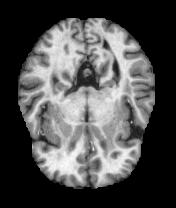

0


In [32]:
import IPython.display as display

for image_features in parsed_image_dataset:
    image_raw = image_features["image_raw"].numpy()
    display.display(display.Image(data=image_raw))
    print(image_features["label"].numpy())